In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from scipy import integrate

###########################
# Setup Plotting Defaults #
###########################
# For more options see https://matplotlib.org/users/customizing.html

# Commands for high detail plots (much larger in file size though)
#mpl.rcParams['agg.path.chunksize'] = 1000
#mpl.rcParams['savefig.dpi'] = 1000

# Line styles
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.antialiased'] = True
mpl.rcParams['lines.dashed_pattern'] = 2.8, 1.5
mpl.rcParams['lines.dashdot_pattern'] = 4.8, 1.5, 0.8, 1.5
mpl.rcParams['lines.dotted_pattern'] = 1.1, 1.5
mpl.rcParams['lines.scale_dashes'] = True

# Default colors
#from cycler import cycler
#mpl.rcParams['axes.prop_cycle'] = cycler('color',['cornflowerblue','forestgreen','maroon','goldenrod','firebrick','mediumorchid'])


# Fonts
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['font.sans-serif'] = 'CMU Sans Serif, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif'
mpl.rcParams['text.usetex'] = True

# Axes
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['axes.labelpad'] = 9.0
                                                  
                                                  
# Tick marks - the essence of life
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.minor.size'] = 2.5
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.75
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.minor.size'] = 2.5
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.75
mpl.rcParams['ytick.major.pad'] = 8
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.minor.visible'] = True

# Legend
mpl.rcParams['legend.fontsize'] = 22
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.framealpha'] = 0.8
#mpl.rcParams['legend.edgecolor'] = 'black'
mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.borderpad'] = 0.4 # border whitespace
mpl.rcParams['legend.labelspacing'] = 0.5 # the vertical space between the legend entries
mpl.rcParams['legend.handlelength'] = 1.5 # the length of the legend lines
mpl.rcParams['legend.handleheight'] = 0.7 # the height of the legend handle
mpl.rcParams['legend.handletextpad'] = 0.5 # the space between the legend line and legend text
mpl.rcParams['legend.borderaxespad'] = 0.5 # the border between the axes and legend edge
mpl.rcParams['legend.columnspacing'] = 2.0 # column separation


# Figure size
mpl.rcParams['figure.figsize'] = 20, 14

# Save details
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1

mpl.rcParams['xtick.labelsize'] = 30
mpl.rcParams['ytick.labelsize'] = 30

# Update plotting
mpl.rcParams['lines.dashed_pattern'] = 6., 4.
mpl.rcParams['legend.fontsize'] = 24
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['axes.labelsize'] = 24

import matplotlib.ticker


In [2]:
vrel = 2.e-5
TeV2cm3s = 1.1673299710900705e-23

### s-wave Unitarity limit ###
# This is equation (10) of [Griest, Kamionkowski 1990], with J=0 for s-wave
def slim(m):
    "m [TeV]"
    return TeV2cm3s*(4.*np.pi)/(m**2.*vrel)

# Add in the finite size, which is (5) in https://arxiv.org/pdf/2203.06029.pdf, or (16) in Kamionkowski and Griest (but they expand in the last step)

### Composite Unitarity limit ###
# This is equation (16) of [Griest, Kamionkowski 1990], but without the approximation that Jmax >> 1 as they use in the final step
def Rlim(m, Rinv):
    "m [TeV], Rinv [TeV]"
    R = 1./Rinv
    return TeV2cm3s*(4.*np.pi)/(m**2.*vrel)*(1.+m*vrel*R)**2.

No handles with labels found to put in legend.


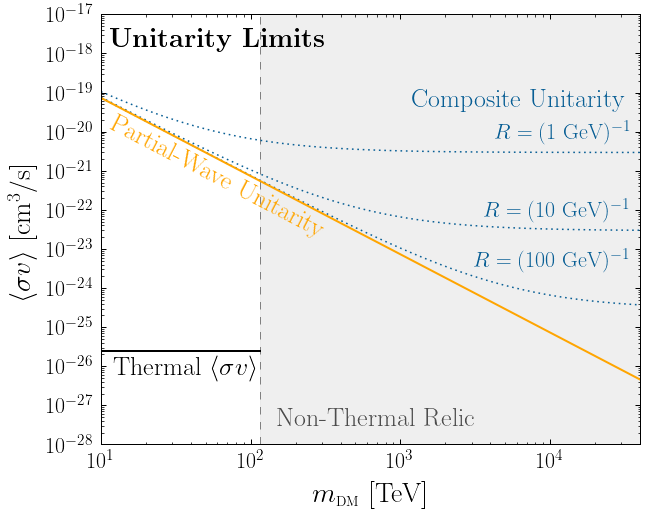

In [18]:
rescale=1.1
plot_h = 10/rescale
plot_w = 8/rescale
fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

plt.xlabel(r'$m_{\scriptscriptstyle {\rm DM}}$ [TeV]',fontsize=28)
plt.ylabel(r'$\langle \sigma v \rangle$ [cm$^3$/s]',fontsize=28)

mpl.rcParams['lines.dashed_pattern'] = 7.5, 7.5
plt.axvline(116.11,ls='--',c='gray',lw=1.)
plt.fill_between([116.11,4.e4],[1.e-28,1.e-28],[1.e-17,1.e-17],color=(0.8,0.8,0.8),alpha=0.3)

plt.plot([10.,116.11],[2.4e-26,2.4e-26],c='black',lw=2.)

mpl.rcParams['lines.dotted_pattern'] = 1.1, 2.5
mv=np.logspace(1.,np.log10(4.e4),100)
cv=(9./256.,95./256.,150./256.)
plt.plot(mv,Rlim(mv,1.e-3),ls=':',c=cv,lw=1.5,zorder=2)
plt.plot(mv,Rlim(mv,1.e-2),ls=':',c=cv,lw=1.5,zorder=2)
plt.plot(mv,Rlim(mv,1.e-1),ls=':',c=cv,lw=1.5,zorder=2)
#plt.plot(mv,Rlim(mv,1.),ls=':',c=cv,lw=1.5,zorder=2)
plt.plot([10.,4.e4],[slim(10.),slim(4.e4)],c='orange',lw=2.,zorder=2)

plt.xscale('log')
plt.yscale('log')
plt.xlim([10.,4.e4])
plt.ylim([1.e-28,1.e-17])

# Restore y ticks
locmaj = mpl.ticker.LogLocator(base=10, numticks=1000)
ax.yaxis.set_major_locator(locmaj)

locmin = mpl.ticker.LogLocator(base=10.0, subs=np.linspace(0, 1.0, 11)[1:-1], numticks=1000)
ax.yaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

# Text
plt.text(1.15e1,1.5e-18,r'\textbf{Unitarity Limits}',fontsize=27)

plt.text(1.2e1,6.e-27,r'Thermal $\langle \sigma v \rangle$',fontsize=26)
plt.text(150,3.e-28,r'Non-Thermal Relic',fontsize=26,color=(0.3,0.3,0.3))
plt.text(1.1e1,2.e-23,r'Partial-Wave Unitarity',fontsize=26,color='orange',rotation=332.5)
plt.text(1.2e3,4.3e-20,r'Composite Unitarity',fontsize=26,color=cv)

plt.text(4.3e3,6.5e-21,r'$R=(1~{\rm GeV})^{-1}$',fontsize=22,color=cv)
plt.text(3.6e3,6.5e-23,r'$R=(10~{\rm GeV})^{-1}$',fontsize=22,color=cv)
plt.text(3.1e3,3.4e-24,r'$R=(100~{\rm GeV})^{-1}$',fontsize=22,color=cv)

plt.tight_layout()
plt.legend()
plt.savefig('./HighMass-Limits.pdf')
plt.show()